# Import Modul
pandas, numpy, matplotlib.pyplot, dan seaborn
- pandas : untuk manipulasi data
- numpy : operasi numerik
- matplotlib.pyplot : Grafik korelasi data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import File

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset_DSA/munich.csv")
display(df.head())

,day,interval,detid,flow,occ,error,city,speed
0,2017-02-14,600,4118014,57.3,0.005,NaN,munich,NaN
1,2017-02-14,900,4118014,10.0,0.000,1.0,munich,NaN
2,2017-02-14,1200,4118014,12.3,0.000,1.0,munich,NaN
3,2017-02-14,1500,4118014,19.8,0.000,1.0,munich,NaN
4,2017-02-14,1800,4118014,24.6,0.000,1.0,munich,NaN


# Display data - Deskripsi Data

In [ ]:
display(df.describe())

,interval,detid,flow,occ,error,speed
count,149270.000000,1.492700e+05,149270.000000,149270.000000,54159.0,0.0
mean,43290.805922,8.320646e+06,225.616397,0.095813,1.0,NaN
std,24888.908901,2.949675e+06,261.188492,0.132340,0.0,NaN
min,300.000000,4.000011e+06,0.000000,0.000000,1.0,NaN
25%,21600.000000,4.105012e+06,48.385185,0.007500,1.0,NaN
50%,43200.000000,1.006601e+07,146.353836,0.040000,1.0,NaN
75%,64800.000000,1.032100e+07,298.300000,0.127469,1.0,NaN
max,86400.000000,1.127301e+07,2184.000000,1.000000,1.0,NaN


# Cleansing Data

In [ ]:
# Assuming 'df' is your original DataFrame loaded from the previous step
# Perform your data cleaning steps here to create df_cleaned

# Drop the 'speed' column as it contains only NaN values
df_cleaned = df.drop(columns=['speed','city'])

# Filter out rows where 'error' is equal to 1. Keep rows where 'error' is not 1 or is NaN.
df_cleaned_2 = df_cleaned[ (df_cleaned['error'] != 1) | (df_cleaned['error'].isna()) ]
display(df_cleaned_2.head())

df_cleaned_last = df_cleaned_2.drop(columns=['error'])

# Display the first few rows of the cleaned DataFrame
display(df_cleaned_last.head())

# Save the cleaned data to a new CSV file
output_filename = 'munich_no_error.csv'
df_cleaned_last.to_csv(output_filename, index=False)


,day,interval,detid,flow,occ,error
0,2017-02-14,600,4118014,57.3,0.005,NaN
7,2017-02-14,2700,4118014,0.0,0.000,NaN
10,2017-02-14,3600,4118014,0.0,0.000,NaN
12,2017-02-14,4200,4118014,0.0,0.000,NaN
13,2017-02-14,4500,4118014,0.0,0.000,NaN


,day,interval,detid,flow,occ
0,2017-02-14,600,4118014,57.3,0.005
7,2017-02-14,2700,4118014,0.0,0.000
10,2017-02-14,3600,4118014,0.0,0.000
12,2017-02-14,4200,4118014,0.0,0.000
13,2017-02-14,4500,4118014,0.0,0.000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Heatmap - Univariat**



,interval,detid,flow,occ
count,95111.000000,9.511100e+04,95111.000000,95111.000000
mean,45529.771530,7.625348e+06,311.370666,0.104330
std,23936.839353,3.116314e+06,289.352278,0.129587
min,300.000000,4.000011e+06,0.000000,0.000000
25%,26100.000000,4.038012e+06,112.484548,0.016659
50%,46200.000000,1.001000e+07,239.774306,0.053358
75%,66000.000000,1.025901e+07,399.470833,0.136441
max,86400.000000,1.127301e+07,2184.000000,0.940000


,interval,detid,flow,occ
0,600,4118014,57.300000,0.005000
1,2700,4118014,0.000000,0.000000
2,3600,4118014,0.000000,0.000000
3,4200,4118014,0.000000,0.000000
4,4500,4118014,0.000000,0.000000
...,...,...,...,...
95106,84900,10004002,86.362368,0.007123
95107,85200,10004002,115.061728,0.006566
95108,85500,10004002,97.421680,0.022000
95109,85800,10004002,135.827160,0.007291


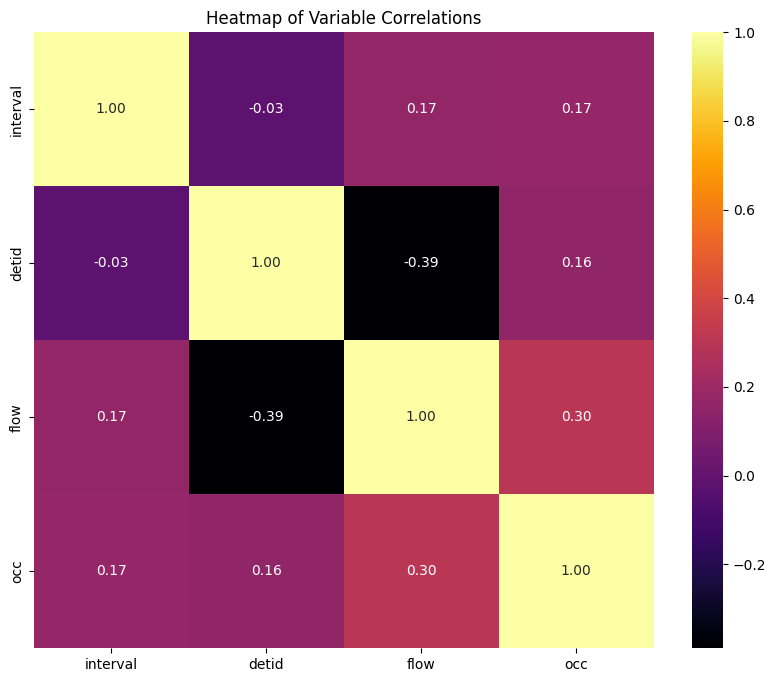

In [ ]:
df_cleaned = pd.read_csv("/content/drive/MyDrive/Dataset_DSA/munich_no_error.csv")
df_cleaned_2 = df_cleaned.drop(columns=['day'])
# Drop non-numeric columns for correlation calculation

# Calculate the correlation matrix
correlation_matrix = df_cleaned_2.corr()
display(df_cleaned_2.describe())

display(df_cleaned_2)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f")
plt.title('Heatmap of Variable Correlations')
plt.show()

# Bivariat Comparation

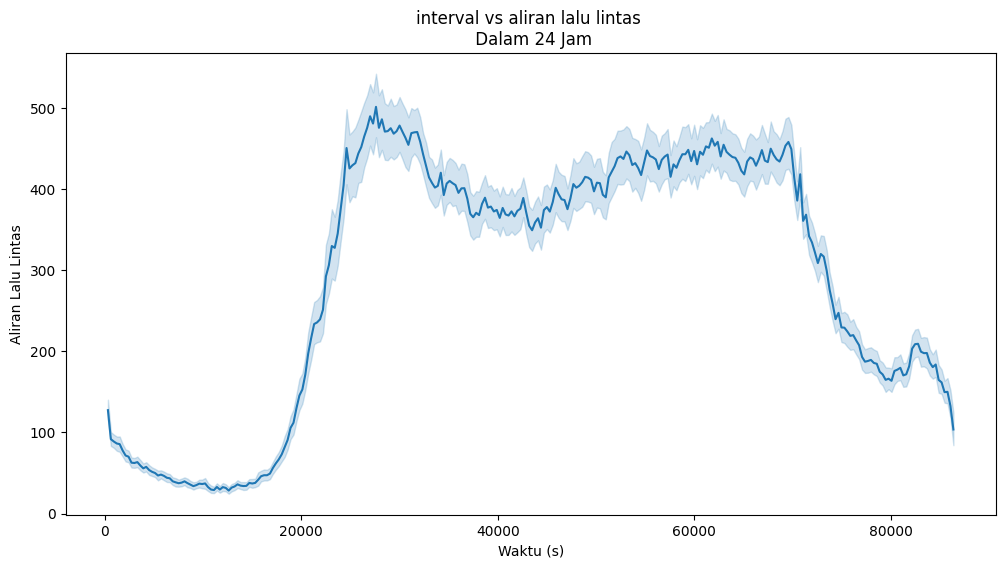

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='interval', y='flow', data=df_cleaned_2)
plt.xlabel('Waktu (s)')
plt.ylabel('Aliran Lalu Lintas')
plt.title('interval vs aliran lalu lintas \n Dalam 24 Jam')
plt.show()

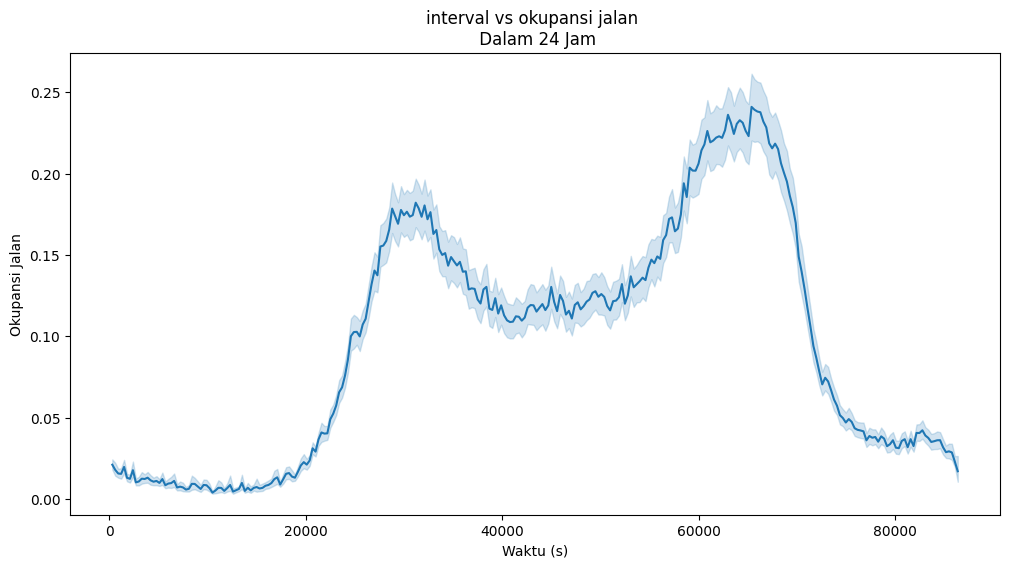

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='interval', y='occ', data=df_cleaned_2)
plt.xlabel('Waktu (s)')
plt.ylabel('Okupansi Jalan')
plt.title('interval vs okupansi jalan \n Dalam 24 Jam')
plt.show()

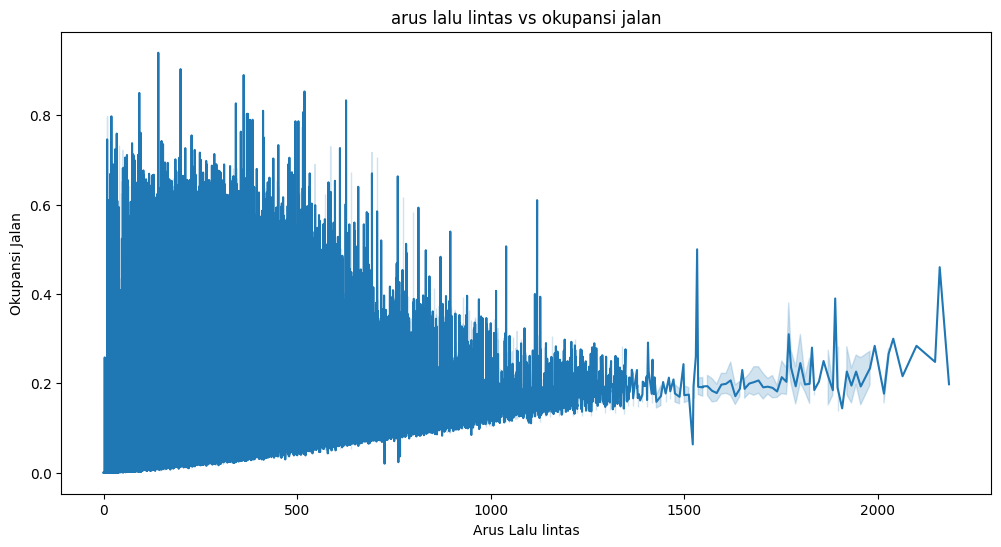

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='flow', y='occ', data=df_cleaned_2)
plt.xlabel('Arus Lalu lintas')
plt.ylabel('Okupansi Jalan')
plt.title('arus lalu lintas vs okupansi jalan')
plt.show()